In [1]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TEMPERATURES = [1]
SIMULATIONS = [2, 4]
TRIAL = 10

env1 = StatelessGym.make('CartPole-v1')
env2 = StatelessGym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)

agent = MCTS.mcts_agent(horizon=30)

experiment1 = Experiment(env1, agent, temperatures=TEMPERATURES, simulations=SIMULATIONS, trial=TRIAL, experiment_name="Cartpole Base MCTS")

Simulation =  2 	Mean Cumulative Reward =  292.5 	Error =  38.40188797442126
Simulation =  4 	Mean Cumulative Reward =  322.2 	Error =  34.759113912756746
Temperature =  1  Results =  [292.5, 322.2]


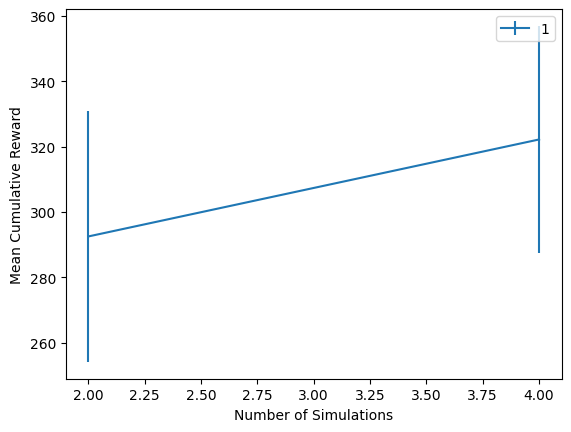

In [16]:
experiment1.run(save=True)
experiment1.show_results()

In [62]:
env = StatelessGym.make('CartPole-v1')
agent = MCTS.mcts_agent(horizon=-1)

rand_experiment = RandomExperiment(env, agent, simulations=[1, 16], temperature=1)
result = rand_experiment.run()
print(result)

ds = rand_experiment.create_dataset(5, "5_dataset")
print(ds)

[1, 13, 500.0]
[['Temperature', 'Simulations', 'Return'], [1, 6, 360.0], [1, 4, 352.0], [1, 15, 302.0], [1, 16, 326.0], [1, 7, 190.0]]


    Temperature  Simulations  Return
0             1            8   308.0
1             1            1     9.0
2             1            2   222.0
3             1           15   324.0
4             1            8   173.0
..          ...          ...     ...
95            1           14   466.0
96            1           15   251.0
97            1           15   271.0
98            1            4   158.0
99            1            1     9.0

[100 rows x 3 columns]
Simulations
1       9.583333
2     262.750000
3     275.666667
4     268.833333
5     322.875000
6     324.666667
7     381.142857
8     364.333333
9     300.500000
10    406.200000
11    271.000000
12    364.400000
13    361.000000
14    440.500000
15    287.400000
16    388.000000
Name: Return, dtype: float64
<PandasArray>
[0.5149286505444373,  96.94457179233915, 105.12056570116683,
  120.3319021152191,   156.776854614631, 142.17547842953323,
 114.61155929403249, 155.16786608917025, 105.97310979677816,
  102.4779651112049, 1

<ErrorbarContainer object of 3 artists>

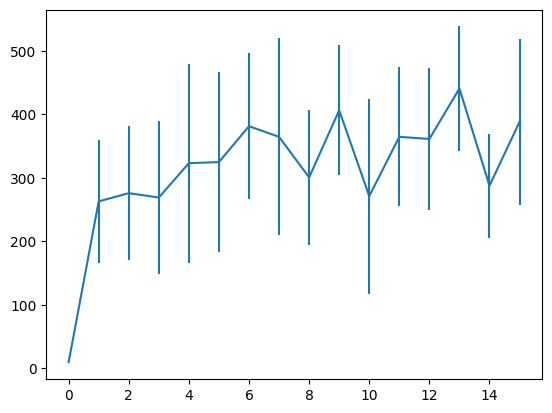

In [61]:
df = pd.read_csv('../datasets/1-100_dataset.csv')
print(df)

group_simulation = df.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()

plt.errorbar(list(range(len(group_simulation))),  mean_returns, yerr=std_returns.array)

In [16]:
dataset_name = "Cluster_%d_1-16_1000-t500-Cartpole.csv"
dataset = pd.DataFrame()

for i in range(1, 11):
    dataset = dataset.append(pd.read_csv('../datasets/' + dataset_name % i), ignore_index=True)
    
print(dataset)

      Temperature  Simulations  Return
0             500            5   223.0
1             500           13   500.0
2             500           12   423.0
3             500            3    68.0
4             500            8   162.0
...           ...          ...     ...
9995          500           13   500.0
9996          500           12   500.0
9997          500           14   210.0
9998          500            5   500.0
9999          500            6   348.0

[10000 rows x 3 columns]


<ErrorbarContainer object of 3 artists>

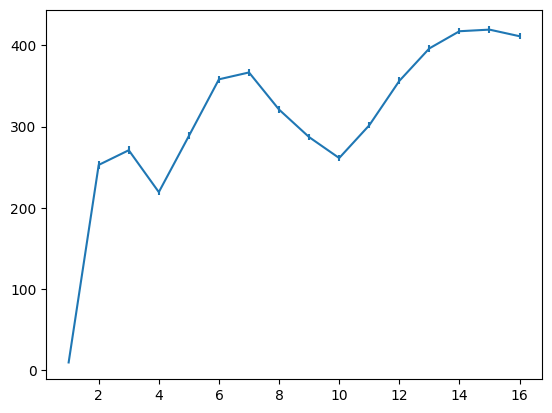

In [19]:
group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
error_returns = group_simulation["Return"].std() / (group_simulation["Return"].count() ** 0.5)

plt.errorbar(list(range(1, len(group_simulation) + 1)),  mean_returns, yerr=error_returns.array)

In [20]:
print(mean_returns)
print(group_simulation["Return"].count())
print(error_returns.array)

Simulations
1       9.369010
2     252.746875
3     270.860720
4     219.237209
5     288.457792
6     358.235849
7     366.684533
8     320.938879
9     287.023891
10    261.234548
11    301.574194
12    356.258567
13    396.339506
14    417.484349
15    419.463054
16    411.332790
Name: Return, dtype: float64
Simulations
1     626
2     640
3     639
4     645
5     616
6     636
7     653
8     589
9     586
10    631
11    620
12    642
13    648
14    607
15    609
16    613
Name: Return, dtype: int64
<PandasArray>
[0.030407615741137633,    5.186520754753652,     4.90642631422099,
   2.9759078463040693,    4.294179437566176,    4.659690318870956,
    4.452849753310745,     4.72784604327862,    4.112805696086718,
   3.2757970316174156,    3.854154812756769,    4.266259343821499,
    4.048247183233061,   3.9302181342348597,   3.8764361386765436,
   3.9762875872872403]
Length: 16, dtype: float64


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

In [23]:
X = dataset['Simulations'].values.reshape(-1, 1)
y = dataset['Return'].values

In [25]:
print(X)
print(y)

[[ 5]
 [13]
 [12]
 ...
 [14]
 [ 5]
 [ 6]]
[223. 500. 423. ... 210. 500. 348.]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Random Forest Regression
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [33]:
linear_predictions = linear_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
forest_predictions = forest_model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error

linear_mse = mean_squared_error(y_test, linear_predictions)
tree_mse = mean_squared_error(y_test, tree_predictions)
forest_mse = mean_squared_error(y_test, forest_predictions)

print("Linear Regression MSE:", linear_mse)
print("Decision Tree Regression MSE:", tree_mse)
print("Random Forest Regression MSE:", forest_mse)


Linear Regression MSE: 14218.481127296827
Decision Tree Regression MSE: 10363.880789647957
Random Forest Regression MSE: 10366.836610537892


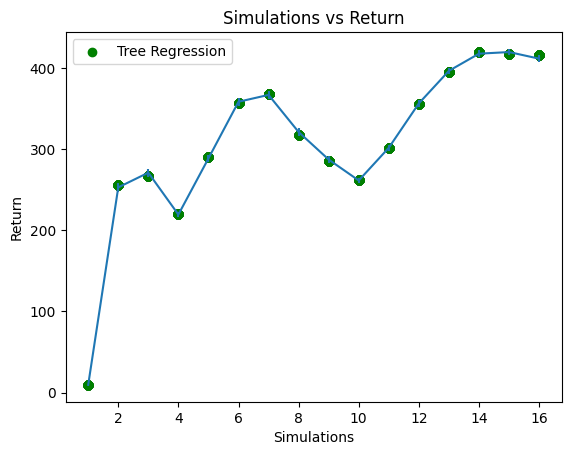

In [49]:
plt.errorbar(list(range(1, len(group_simulation) + 1)),  mean_returns, yerr=error_returns.array)
#plt.plot(X_test, linear_predictions, linewidth=2, color='red', label='Linear Regression')
plt.scatter(X_test, tree_predictions, color='green', label='Tree Regression')
#plt.scatter(X_test, forest_predictions, color='red', label='Forest Regression')


plt.xlabel('Simulations')
plt.ylabel('Return')
plt.title('Simulations vs Return')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(30, 30))
plot_tree(tree_model, feature_names=['Simulation'], filled=True)
plt.title('Decision Tree Regression')
plt.show()
